*Изменения в сравнении с прошлой присланной версией*:
в первой задаче сделано дополнение с предсказанием логарифма таргета и выводом весов модели.

# Вспомогательный код

In [1]:
import random
import numpy as np


def set_seed():
    random.seed(42)
    np.random.seed(42)

# Задание 1. Множественная линейная регрессия

Почти все проблемы реального мира, с которыми вы столкнетесь, будут иметь более двух переменных. Линейная регрессия с участием нескольких переменных называется **«множественной линейной регрессией» (Multiple Linear Regression)**.

Уравнение множественной линейной регрессии имеет вид:

$y = b_0 + b_1 * x_1 + b_2 * x_2 + ... + b_n * x_n$

Отличие между простой и множественной линейной регрессией заключается в том, что вместо линии регрессии в ней используется гиперплоскость.

В этом задании мы будем использовать множественную линейную регрессию для прогнозирования потребления бензина (в миллионах галлонов) в 48 штатах США на основе: налогов на бензин (в центах), дохода на душу населения (в долларах), шоссе с твердым покрытием (в милях) и доли населения, имеющего водительские права.

Задание:

1. Разделить датасет на тренировочную и тестовую части в соотношении 4 к 1 (`random_state=42`)
1. Провести нормализацию/стандартизацию данных одним из рассмотренных на лекции способов
1. Реализовать множественную линейную регрессию с помощью sklearn
1. Обучить модель
1. Вывести сравнительную таблицу y_test и y_pred
1. Выведите параметры качества модели:
  - Mean Absolute Error
  - Mean Squared Error
  - Root Mean Squared Error

Импорт необходимых библиотек:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Загрузка датасета:

In [3]:
!wget -q https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/petrol_consumption.csv

!wget доступен в colab, но недоступен через локальный jupyter.

В локальном случае требуется [скачать](https://www.kaggle.com/code/kerneler/starter-petrol-consumption-2d0bf1e7-0/input) petrol_consumption.csv самостоятельно.

In [4]:
dataset = pd.read_csv("/content/petrol_consumption.csv")
print(dataset.shape)
dataset.head()

(48, 5)


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [5]:
x = dataset[
    ["Petrol_tax", "Average_income", "Paved_Highways", "Population_Driver_licence(%)"]
]
y = dataset["Petrol_Consumption"]

In [6]:
set_seed()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
# Normalization
# Your code here
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
# Multiple regression
# Your code here
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [12]:
# Print table
y_pred = regressor.predict(x_test)
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
27,631,606.692665
40,587,673.779442
26,577,584.991490
43,591,563.536910
24,460,519.058672
37,704,643.461003
12,525,572.897614
19,640,687.077036
4,410,547.609366
25,566,530.037630


In [13]:
# Metrics
# Your code here
def print_metrics(y_true, y_predicted):
    print(f"Mean absolute error: {metrics.mean_absolute_error(y_true, y_predicted):.3f}")
    print(f"Mean squared error: {metrics.mean_squared_error(y_true, y_predicted):.3f}")
    print(
        "Root mean squared error: ",
        f"{metrics.mean_squared_error(y_true, y_predicted, squared=False):.3f}",
    )
    print(f"R2 score: {metrics.r2_score(y_true, y_predicted):.3f}")


print_metrics(y_test, y_pred)

Mean absolute error: 53.469
Mean squared error: 4083.256
Root mean squared error:  63.900
R2 score: 0.391


**Дополнительно**: прологарифмируем таргет

In [10]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

regressor_log = LinearRegression()
regressor_log.fit(x_train, y_train_log)

print('Metrics on train data:')
print_metrics(y_train, np.exp(regressor_log.predict(x_train)))

Metrics on train data:
Mean absolute error: 46.770
Mean squared error: 3746.361
Root mean squared error:  61.208
R2 score: 0.727


In [14]:
print('Metrics on test data:')
print_metrics(y_test, np.exp(regressor_log.predict(x_test)))

Metrics on test data:
Mean absolute error: 49.284
Mean squared error: 3421.588
Root mean squared error:  58.494
R2 score: 0.490


Видно, что все метрики улучшились при использовании модели, которая предсказывает логариф от исходного таргета. Если брать коэффициент R2, то вообще можно сказать, что мы "бесплатно" получили увеличение почти до 0.5.

In [32]:
weights = pd.DataFrame(columns=x.columns)
weights.loc['linreg_log'] = np.abs(regressor_log.coef_)
weights

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
linreg_log,0.058902,0.070797,0.025252,0.128898


Исходя из коэффициентов, можно сказать, что последний признак, Population_Driver_licence является наиболее значимым, затем идет Average_income, затем Petrol_tax и наконец Paved_Highways.

Попробуем вывести веса для регрессора лассо. По идее лассо должен занижать коэффициенты перед незначимыми признаками.

In [30]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=5)
lasso.fit(x_train, y_train)

print('Metrics on train data:')
print_metrics(y_train, lasso.predict(x_train))

Metrics on train data:
Mean absolute error: 48.426
Mean squared error: 4143.628
Root mean squared error:  64.371
R2 score: 0.698


In [31]:
print('Metrics on test data:')
print_metrics(y_test, lasso.predict(x_test))

Metrics on test data:
Mean absolute error: 53.742
Mean squared error: 3939.440
Root mean squared error:  62.765
R2 score: 0.413


In [33]:
weights.loc['lasso'] = np.abs(lasso.coef_)
weights

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
linreg_log,0.058902,0.070797,0.025252,0.128898
lasso,26.138140,29.638500,5.563658,76.201686


Видно, что лассо сильно занизило коэффициент перед Paved_Highways по соотношению к другим коэффициентам (для linreg он был в 6 раз меньше чем самый большой коэффициент, с lasso он стал меньше уже где-то в 12 раз). При этом лассо не изменило порядок важности коэффициентов.

При этом разница в коэффициентах между linreg и lasso может быть появилась из-за того, что коэффициенты для linreg здесь приведены для регрессора, который обучался на логарифме таргета, а lasso обучался на исходном таргете (при обучении на логарифме качество lasso было гораздо хуже по метрикам)

## Формат результата

Вывод метрик качества:

* Mean Absolute Error ~ 60
* Mean Squared Error: ~ 4700
* Root Mean Squared Error: ~ 70

# Задание 2. Kernel SVM

В этом задании вы будете применять обобщенную линейную модель Kernel SVM, для решения нелинейной задачи.  

Для этого задания мы сгенерируем датасет, представляющий собой **две закрученные спирали**, относящиеся к разным классам. Для этого воспользуемся кодом из [источника](https://glowingpython.blogspot.com/2017/04/solving-two-spirals-problem-with-keras.html). Такие данные могут вызвать проблемы не только у линейной модели, но и у маленькой нейронной сети.

Импорт необходимых библиотек:

In [ ]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

Генерация датасета:

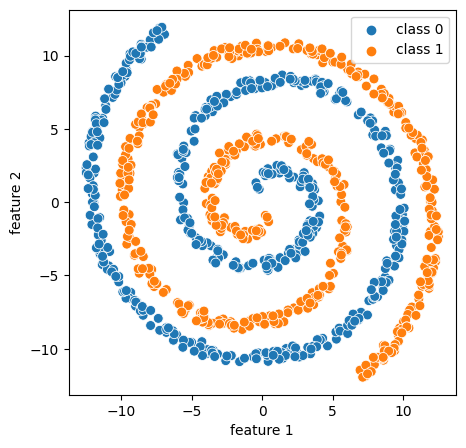

In [ ]:
set_seed()


def twospirals(n_points, noise=0.8):
    """
    Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points, 1)) * 780 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(n_points, 1) * noise
    d1y = np.sin(n) * n + np.random.rand(n_points, 1) * noise
    return (
        np.vstack((np.hstack((d1x, d1y)), np.hstack((-d1x, -d1y)))),
        np.hstack((np.zeros(n_points), np.ones(n_points))),
    )


x, y = twospirals(500)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, s=50, ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["class 0", "class 1"])
ax.set(xlabel="feature 1", ylabel="feature 2")
plt.show()

In [ ]:
x.shape

(1000, 2)

Разделите датасет на **тренировочную и тестовую части** в соотношении 4 к 1 (`random_state=42`):

In [ ]:
set_seed()
# Your code here
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

**Нормализуйте признаки** (подсказка: не “подглядывайте” в test):


In [ ]:
# Your code here
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Попробуйте применить различные ядра для `svm.SVC`. Постройте **разделяющие кривые для train** части датасета. Посчитайте значения метрики **accuracy для test** части датасета.

In [ ]:
# Your code here
def plot_svm(x, y, clf):
    dull_cmap = ListedColormap(["#B8E1EC", "#FEE7D0"])
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        x,
        response_method="predict",
        cmap=dull_cmap,
        alpha=0.8,
        xlabel="feature 1",
        ylabel="feature 2",
        ax=ax,
    )

    sns.scatterplot(
        x=x[:, 0],
        y=x[:, 1],
        hue=y,
        s=50,
        ax=ax,
        palette=sns.color_palette(["#2DA9E1", "#F9B041"]),
    )
    plt.show()

In [ ]:
clf_lin = svm.SVC(kernel="linear")
clf_lin.fit(x_train, y_train)

clf_poly = svm.SVC(kernel="poly")
clf_poly.fit(x_train, y_train)

clf_rbf = svm.SVC(kernel="rbf")
clf_rbf.fit(x_train, y_train)


SVC()

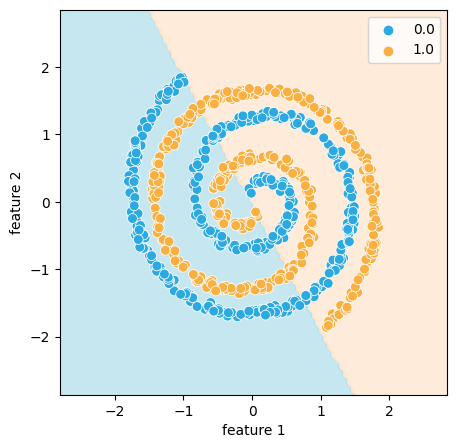

In [ ]:
plot_svm(x_train, y_train, clf_lin)

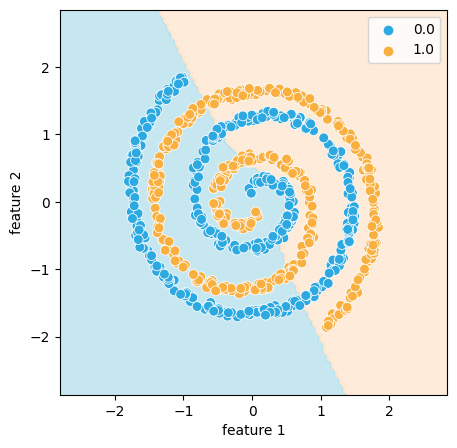

In [ ]:
plot_svm(x_train, y_train, clf_poly)

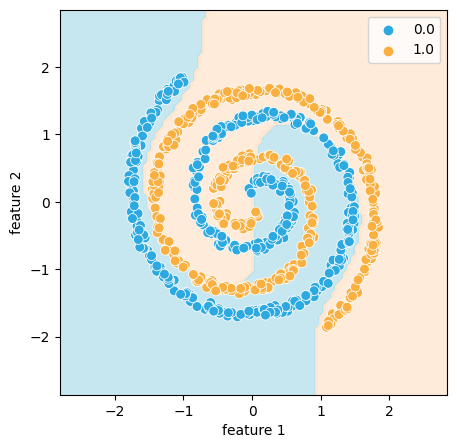

In [ ]:
plot_svm(x_train, y_train, clf_rbf)

In [ ]:
y_pred_lin = clf_lin.predict(x_test)
y_pred_poly = clf_poly.predict(x_test)
y_pred_rbf = clf_rbf.predict(x_test)

print(f'Accuracy score for linear svm: {accuracy_score(y_test, y_pred_lin):.3f}')
print(f'Accuracy score for polynomial svm: {accuracy_score(y_test, y_pred_poly):.3f}')
print(f'Accuracy score for gaussian svm: {accuracy_score(y_test, y_pred_rbf):.3f}')

Accuracy score for linear svm: 0.600
Accuracy score for polynomial svm: 0.640
Accuracy score for gaussian svm: 0.760


Ядра со значениями по умолчанию не позволяют качественно разделить классы. Для решения задачи необходимо изменить параметры ядра.

Выберете ядро, которое дает **наилучшее значение accuracy**, ознакомьтесь со **списком настраиваемых параметров** этого ядра в документации [`sklearn`](https://scikit-learn.org/stable/modules/svm.html#kernel-functions), **подберите гиперпараметры модели**. Для подбора гиперпараметров модели воспользуйтесь кросс-валидацией (`cross_val_score`). Пример подбора параметров можно найти в [документации](https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_digits.html#sphx-glr-auto-examples-exercises-plot-cv-digits-py).Также можно использовать [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) или [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV). Используйте разбиение на 4 фолда и `accuracy` в качестве целевой метрики.

Подсказка: при очень больших значения обратного коэффициента нормализации модель может плохо сходиться. Ограничьтесь максимальным значением  $10^5$.

In [ ]:
# Your code here
from sklearn.model_selection import GridSearchCV, StratifiedKFold

parameters = {'C': np.geomspace(0.001, 10000, num=8), 'gamma': np.geomspace(0.01, 10000, num=7)}
cv = StratifiedKFold(n_splits=4)
svc = svm.SVC(kernel='rbf')
clf = GridSearchCV(svc, param_grid=parameters, scoring='accuracy', cv=cv)
clf.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])},
             scoring='accuracy')

Обучите модель с подобранными гиперпараметрами. Постройте разделяющую кривую для train части датасета и значение accuracy для test.

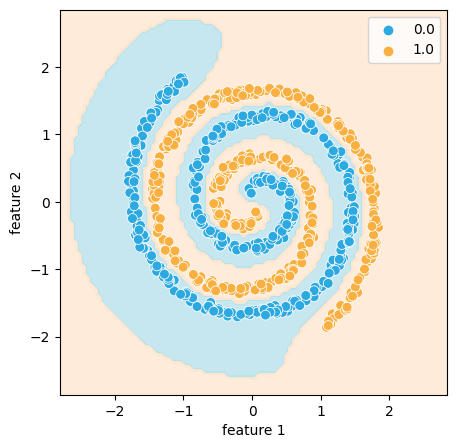

In [ ]:
# Your code here
best = clf.best_estimator_
best.fit(x_train, y_train)
plot_svm(x_train, y_train, best)

In [ ]:
print(f'Accuracy score for rbf svm: {accuracy_score(y_test, best.predict(x_test)):.3f}')

Accuracy score for rbf svm: 1.000


## Формат результата

* Значение accuracy для test части датасета >0.95.
* График разделяющей кривой для train части датасета.

Пример графика:

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/Exercises/EX02/result_2_task_ex02.png" width="500">

# Задание 3. Модель классификатора

В этом задании нужно написать линейный классификатор и обучить его на датасете CIFAR-10.

Импорт необходимых библиотек:

In [ ]:
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
from collections import defaultdict
from sklearn.metrics import accuracy_score
from IPython.display import clear_output

Для оценки прогресса обучения мы будем использовать следующий код для визуализации:

In [ ]:
class ProgressPlotter:
    def __init__(self) -> None:
        self._history_dict = defaultdict(list)

    def add_scalar(self, tag: str, value) -> None:
        self._history_dict[tag].append(value)

    def display_plot(self) -> None:
        clear_output()
        n_keys = len(self._history_dict)
        fig, ax = plt.subplots(n_keys, 1, figsize=(12, 3 * n_keys))
        for key_idx, key in enumerate(self._history_dict.keys()):
            history_len = len(self._history_dict[key])
            if n_keys == 1:
                ax.plot(self._history_dict[key], color="c", marker="X")
                ax.set_ylabel(key)
                ax.set_xlabel("step")
                ax.set_xticks(np.arange(history_len))
                ax.set_xticklabels(np.arange(history_len))
            elif n_keys > 1:
                ax[key_idx].plot(self._history_dict[key], color="c", marker="X")
                ax[key_idx].set_ylabel(key)
                ax[key_idx].set_xlabel("step")
                ax[key_idx].set_xticks(np.arange(history_len))
                ax[key_idx].set_xticklabels(np.arange(history_len))
        fig.tight_layout()
        plt.show()

Вам не обязательно подробно разбираться с этим кодом, но для отладки (чтобы вы могли понять, как он работает, какие переменные в каком формате поступают на вход и т.д.) приводим пример работы:

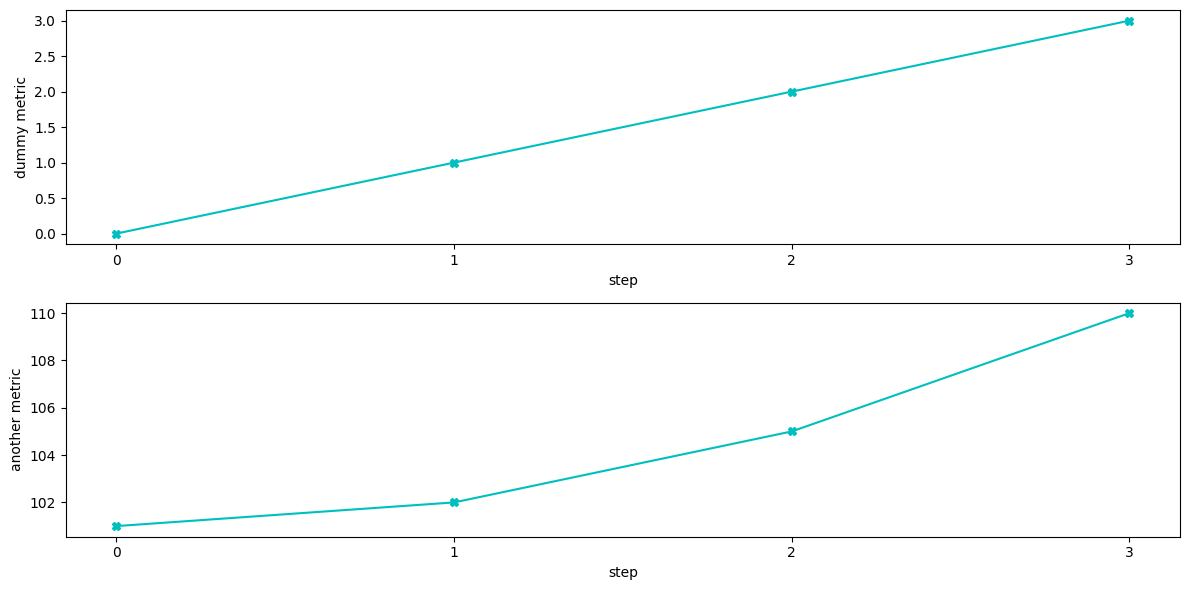

In [ ]:
pp = ProgressPlotter()

for i in range(4):
    pp.add_scalar(tag="dummy metric", value=i)
    pp.add_scalar(tag="another metric", value=i**2 + 101)
    pp.display_plot()

## Скачивание датасета CIFAR-10

### Стандартный способ

In [ ]:
train_dataset = datasets.CIFAR10("content", train=True, download=True)
test_dataset = datasets.CIFAR10("content", train=False, download=True)

100%|██████████| 170498071/170498071 [00:01<00:00, 102622729.15it/s]


Extracting content/cifar-10-python.tar.gz to content
Files already downloaded and verified


In [ ]:
x_train = np.array(train_dataset.data)
x_test = np.array(test_dataset.data)

y_train = np.array(train_dataset.targets)
y_test = np.array(test_dataset.targets)

# flatten
x_train = x_train.transpose(0, 3, 2, 1).reshape(x_train.shape[0], -1)
x_test = x_test.transpose(0, 3, 2, 1).reshape(x_test.shape[0], -1)

labels = [
    "Airplane",
    "Car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck",
]


def to_img(arr):
    # Transform data from vector to array with 3 channel(RGB)
    img = (arr * 255).reshape(32, 32, 3).astype(int)
    return img


# display data(shape [..., 3072])
print("labels: ", labels)
print("Training data shape: ", x_train.shape)
print("Training labels shape: ", y_train.shape)
print("Test data shape: ", x_test.shape)
print("Test labels shape: ", y_test.shape)

labels:  ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
Training data shape:  (50000, 3072)
Training labels shape:  (50000,)
Test data shape:  (10000, 3072)
Test labels shape:  (10000,)


### Способ через colab

В этом разделе код для скачивания нестандартного датасета, который покажет, как загружать датасеты в colab.


In [ ]:
IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    !wget https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/cifar-10-python.tar.gz
    !tar -xzf cifar-10-python.tar.gz
    !ls -l
    top_path = "/content"
else:
    top_path = ""
    print("You didn't run code in colab")

Распакуем данные

In [ ]:
# Recreating python object from the bytecode of the batches
def unpickle(file, encoding="bytes"):
    import pickle

    with open(file, "rb") as fo:
        dict = pickle.load(fo, encoding=encoding)
    return dict


def load_train_data():
    x_train = []
    y_train = []
    for i in range(1, 6):
        raw = unpickle(f"cifar-10-batches-py/data_batch_{i}")
        x_train.append(raw[b"data"])
        y_train.append(raw[b"labels"])
    x_train = np.vstack(x_train)
    y_train = np.hstack(y_train)
    return x_train, y_train


x_train, y_train = load_train_data()

#  load test data
test = unpickle(top_path + "/cifar-10-batches-py/test_batch")
x_test = np.array(test[b"data"])
y_test = np.array(test[b"labels"])

# load classes names
meta = unpickle(top_path + "/cifar-10-batches-py/batches.meta", "utf-8")
labels = meta["label_names"]


def to_img(arr):
    # Transform data from vector to array with 3 channel(RGB)
    img = arr.reshape(3, 32, 32).transpose(1, 2, 0).astype(int)
    return img


# display data(shape [..., 3072])
print("labels: ", labels)
print("Training data shape: ", x_train.shape)
print("Training labels shape: ", y_train.shape)
print("Test data shape: ", x_test.shape)
print("Test labels shape: ", y_test.shape)

### Локальный способ

Эта инструкция нужна, если вы запускаете блокнот локально:
1. Скачайте архив с датасетом CIFAR-10 с оффициального
[сайта](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz). И не удаляйте его в течение курса, он ещё не раз пригодится.
2. Распакуйте архив в папку с заданием.
3. Проверьте, в какой директории запущен блокнот, командой `cd`.
4. Если директория не та, в которой лежат файлы датасета, смените её с помощью `cd C:\some\directory\with\dataset`.
5. Проверьте командой `ls`, видит ли блокнот файлы датасета.

## Просмотр данных

Отобразим данные графически:

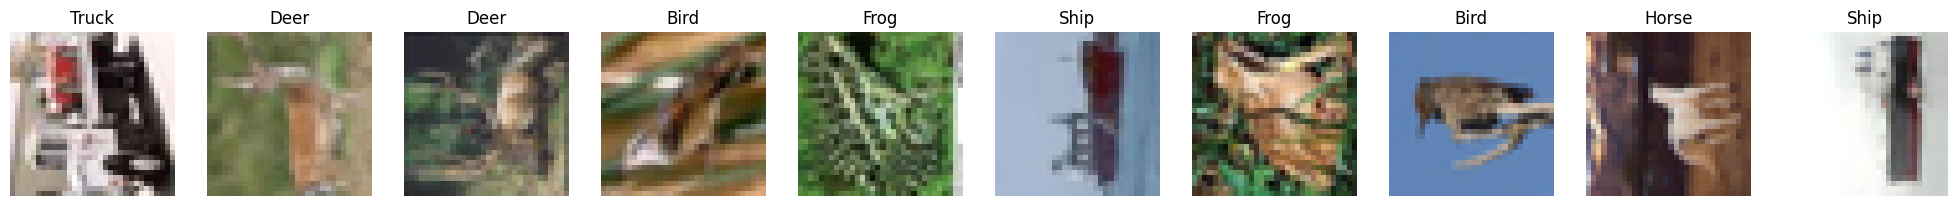

In [ ]:
def to_img(arr):
    # Transform data from vector to array with 3 channel(RGB)
    img = arr.reshape(3, 32, 32).transpose(1, 2, 0).astype(int)
    return img


plt.rcParams["figure.figsize"] = (25, 10)
image_to_display = 10
j = 1
for i in random.sample(range(0, len(x_train)), image_to_display):
    plt.subplot(1, image_to_display, j)
    plt.imshow(to_img(x_train[i]))
    plt.axis("off")
    plt.title(labels[int(y_train[i])])
    j += 1

## Написание модели

В этой части вам предлагается написать два класса:
* первый — это `Linear` — линейная модель или линейный слой (про слои вы подробнее узнаете на 5-й лекции), который будет обучаться;
* второй — `CrossEntopy`, включающий SoftMax и CrossEntropy Loss (они объединены вместе для удобства расчета градиента), в котором логиты с выхода линейной модели будут преобразовываться в вероятности, после чего будет рассчитываться Loss функция.

Вам даны шаблоны классов, в которых нужно заполнить пробелы в точках `# Your code here`. Обратите внимание на то, как оформлены комментарии. Такой стиль оформления называется docstring, подробно  об оформлении кода можно почитать по [ссылке](https://www.programiz.com/python-programming/docstrings).

Подсказка: не забудьте про трюк “столбец единиц”

In [ ]:
class Linear:
    """Linear layer"""

    def __init__(self, input_size, classes_num):
        """
        Initializing of weights

        Parameters
        ----------
        input_size: int
            number of input features
        classes_num: int
            number of output logits (number of classes)
        """
        # Generate a random weight matrix of small numbers
        # Number of weights changed from input_size to input_size+1 for implement bias trick
        self.w = np.random.randn(input_size + 1, classes_num) * 0.0001

    def forward(self, x):
        """
        Forward pass of linear layer: logit calculation.
        (save self.x for using for grad function)

        Parameters
        ----------
        x: np.array
            array of input features with size [batch_size, input_size]

        Returns
        -------
        s: np.array
            array of logits for all classes with size [batch_size, classes_num]
        """
        # Your code here
        self.x = np.hstack((np.ones((x.shape[0], 1)), x))
        s = self.x.dot(self.w)

        return s

    def grad(self, dl_ds):
        """
        Gradient calculation
        (use self.x, save self.dl_dw - gradient dL/dw)

        Parameters
        ----------
        dl_ds: np.array
            array of gradient dL/ds, s - logit
            with size [batch_size, classes_num]
        """
        # Your code here
        self.dl_dw = self.x.T.dot(dl_ds)

    def step(self, lr):
        """
        Gradient descent step
        Changing self.w values with using self.dl_dw

        Parameters
        ----------
        lr: float
            learning rate
        """
        # Your code here
        self.w = self.w - lr * self.dl_dw

Подсказка: используйте `axis=1, keepdims=True` при вычислении максимумов и сумм по строкам. Не забудьте о методе избегания None в расчете SoftMax.

In [ ]:
class CrossEntopy:
    """SoftMax and CrossEntropy"""

    def forward(self, s, y_true):
        """
        Forward pass of SoftMax and CrossEntropy: loss calculation.
        (save
         self.probs - probability of labels with size [batch_size, classes_num])
         self.y_true - true class labels  with size [batch_size]
         for using for grad function)

        Parameters
        ----------
        s: np.array
            array of logits for all classes with size [batch_size, classes_num]

        Returns
        -------
        loss: float
            sum of loss for objects sum(loss_i)/batch_size
        """
        self.y_true = y_true
        self.batch_size = s.shape[0]

        # SoftMax
        # Your code here
        s_max = np.max(s, axis=1, keepdims=True)
        self.probs = np.exp(s - s_max) / np.sum(np.exp(s - s_max), axis=1, keepdims=True)

        # Loss
        true_prob = np.zeros_like(self.probs)
        true_prob[np.arange(len(self.y_true)), self.y_true] = 1
        loss = np.sum(-true_prob * np.log(self.probs))

        return loss / self.batch_size

    def grad(self):
        """
        Gradient calculation
        (use self.probs and self.y_true,
         don't forget divide by batch size)

        Returns
        -------
        dl_ds: np.array
            array of gradient dL/ds, s - logit
            with size [batch_size, classes_num]
        """
        # with dividing by batch size
        # Your code here
        dl_ds = np.copy(self.probs)
        dl_ds[np.arange(len(self.y_true)), self.y_true] -= 1
        return dl_ds / self.batch_size

## Обучение модели

В этой части задания нужно написать класс `LinearClassifier`, в котором будет происходить обучение модели.

Подсказка: суммируйте `loss` со всех батчей.

In [ ]:
random.seed(42)
np.random.seed(42)

class LinearClassifier:
    def __init__(self, input_size, classes_num, batch_size=256):
        """
        Initialization of parts and hyperparameters of the model

        Parameters
        ----------
        input_size: int
            number of input features
        classes_num: int
            number of classes
        batch_size: int
            number of objects in batch
        """
        self.linear = Linear(input_size, classes_num)
        self.loss = CrossEntopy()
        self.batch_size = batch_size

    def epoch(self, x, y, lr=1e-7, train=True):
        """
        One epoch of model training or validation

        Parameters
        ----------
        x: np.array
            array of input features with size [len_data, input_size]
        y: np.array
            array of true class labels  with size [len_data]
        lr: float
            learning rate
        train: bool
            flag enabling training mode
        """
        len_data = x.shape[0]
        indexes = list(range(len_data))
        if train:
            random.shuffle(indexes)
        loss = 0
        for i in range(0, len_data, self.batch_size):
            # Batch generation
            idx = indexes[i : i + self.batch_size]
            x_batch = x[idx]
            y_batch = y[idx]
            # Run model
            s = self.linear.forward(x_batch)

            # Calculate Loss
            loss += self.loss.forward(s, y_batch)

            if train:
                # Calculate gradient
                # Your code here
                self.linear.grad(self.loss.grad())

                # Gradient descent step
                self.linear.step(lr=lr)

        return loss*self.batch_size/len_data

    def train(self, x_train, y_train, x_test, y_test, lr=2e-7, epochs=30):
        """
        Model training

        Parameters
        ----------
        x_train: np.array
            array of train input features with size [len_train, input_size]
        y_train: np.array

        x_test: np.array
            array of test input features with size [len_test, input_size]
        y_test: np.array

        lr: float
            learning rate
        epochs: int
            number of training epochs
        """
        pp = ProgressPlotter()
        for i in range(epochs):
            # Epoch of learning
            loss_train = self.epoch(x_train, y_train, lr)
            loss_test = self.epoch(x_test, y_test, train=False)
            y_pred = self.predict(x_test)
            acc_test = accuracy_score(y_test, y_pred)
            pp.add_scalar(tag="Train Loss", value=loss_train)
            pp.add_scalar(tag="Test Loss", value=loss_test)
            pp.add_scalar(
                tag="Test Accuracy", value=acc_test
            )
            pp.display_plot()
            print(f"Epoch = {i+1}, Train Loss = {loss_train:.3f}, "
                  f"Test Loss = {loss_test:.3f}, Test acc = {acc_test}")

    def predict(self, x):
        """
        Model predict

        Parameters
        ----------
        x: np.array
            array of input features with size [len_data, input_size]

        Returns
        -------
        y_pred: np.array
            array of predicted lable with size [len_data]
        """
        y_pred = []
        len_data = x.shape[0]
        indexes = list(range(len_data))
        for i in range(0, len_data, self.batch_size):
            # Batch generation
            idx = indexes[i : i + self.batch_size]
            x_batch = x[idx]
            # Prediction
            s = self.linear.forward(x_batch)
            y_pred.append(np.argmax(s, axis=1))
        return np.concatenate(y_pred, axis=0)

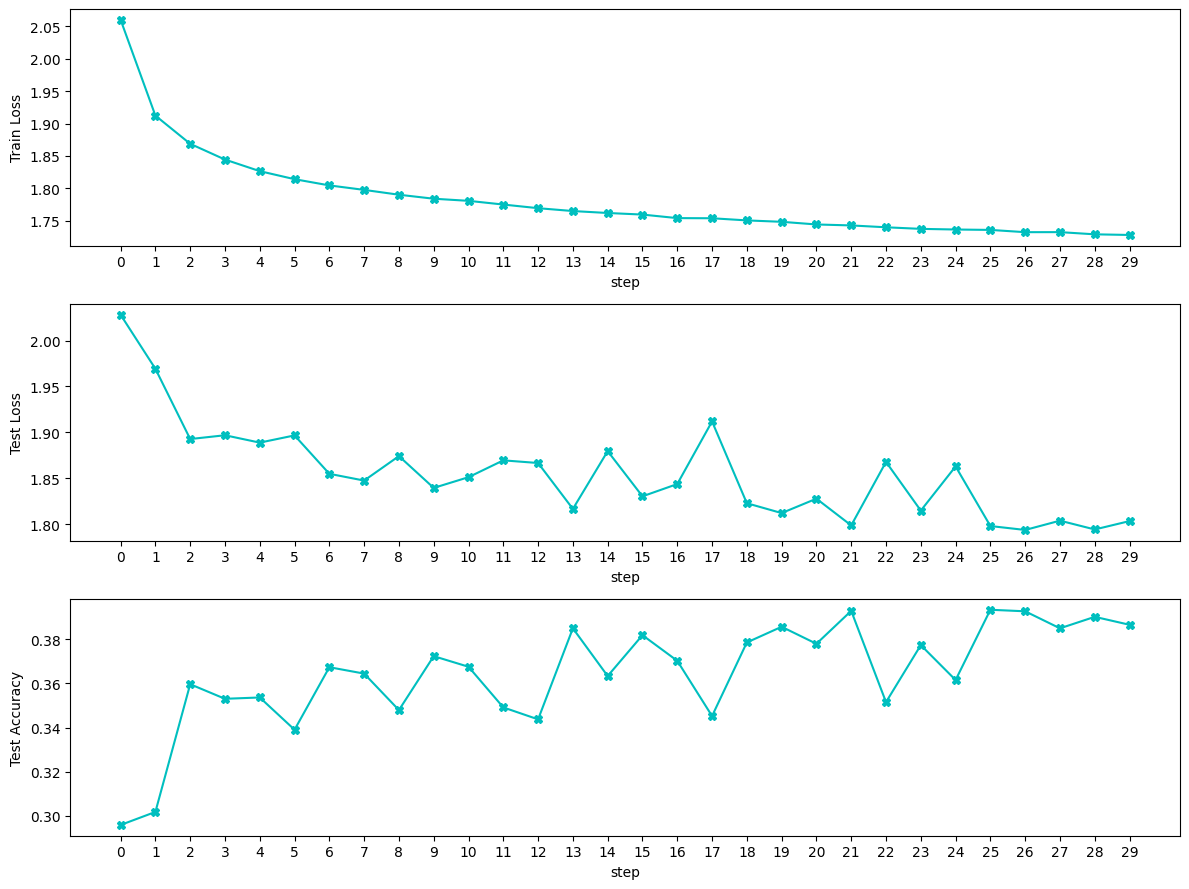

Epoch = 30, Train Loss = 1.728, Test Loss = 1.803, Test acc = 0.3865


In [ ]:
model = LinearClassifier(x_train.shape[1], len(labels))
model.train(x_train, y_train, x_test, y_test)

## Формат результата

* Значение accuracy для test части датасета >0.35.
* График разделяющей кривой для train части датасета.

Пример графика:

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/Exercises/EX02/result_3_task_ex02.png" width="500">

# Задание 4. Написание sklearn-совместимой модели

В этом задании мы наследуемся от написанного нами класса `LinearClassifier` и базовых классов `sklearn`, чтобы сделать `sklearn`-совместимую модель.

Подсказка: о списке обязательных параметров и атрибутов для `sklearn` совместимой модели можно почитать [тут](https://scikit-learn.org/stable/developers/develop.html#estimators).

Для экономии времени мы будем использовать датасет рукописных цифр MNIST.

Импорт необходимых библиотек:

In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, ClassifierMixin

Загрузка данных:

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Посмотрим на данные:

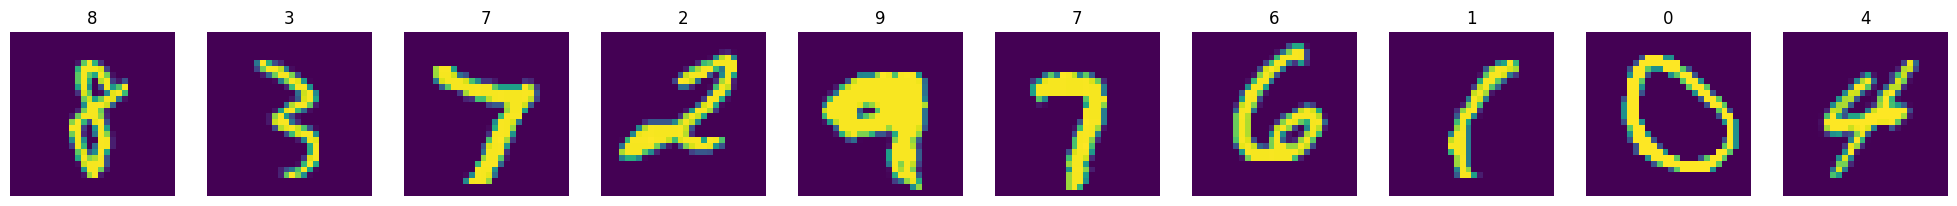

In [ ]:
plt.rcParams["figure.figsize"] = (25, 10)
image_to_display = 10
j = 1
for i in random.sample(range(0, len(x_train)), image_to_display):
    plt.subplot(1, image_to_display, j)
    plt.imshow(x_train[i])
    plt.axis("off")
    plt.title(int(y_train[i]))
    j += 1

Вытянем данные в вектор:

In [ ]:
# flatten
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
x_train.shape

(60000, 784)

Напишем класс модели. Наследуемся у:
- [`BaseEstimator`](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html#sklearn-base-baseestimator) — базовый класс всех estimator в sklearn.
- [`ClassifierMixin`](https://scikit-learn.org/stable/modules/generated/sklearn.base.ClassifierMixin.html#sklearn-base-classifiermixin) — определяет метод score как среднюю accuracy.
- Наш класс `LinearClassifier`

Метод `predict` уже определен в классе LinearClassifier, нам необходимо написать `fit`и объявить нужные параметры.

In [ ]:
class SKLinearClassifier(BaseEstimator, ClassifierMixin, LinearClassifier):
    def __init__(
        self,
        input_size=784,
        classes_num=10,
        batch_size=1024,
        lr=2e-7,
        epochs=30,
    ):
        LinearClassifier.__init__(self, input_size, classes_num, batch_size)
        self.lr = lr
        self.epochs = epochs
        self.classes_num = classes_num
        self.input_size = input_size

    def fit(self, X, y):
        for i in range(self.epochs):
            # Epoch of learning
            self.epoch(X, y, self.lr)

        return self

Проверим работу модели.

In [ ]:
model = SKLinearClassifier()

In [ ]:
model.fit(x_train, y_train)

SKLinearClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
df = pd.DataFrame()
df["y_pred"] = y_pred
df["y_true"] = y_test
df.head()

,y_pred,y_true
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


Посмотрим на качество на кросс-валидации

In [ ]:
set_seed()
scores = cross_val_score(model, x_train, y_train, n_jobs=-1, cv=4)
print(f"Accuracy: {scores.mean():.3f}, std: {scores.std():.3f}")

Accuracy: 0.870, std: 0.006


## Формат результата

* `sklearn`-совместимая модель
* Значение accuracy на кросс-валидации >0.85.